In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as gaussian

### Probability Density Function
- PDF a.k.a. Probability Distribution Density Function
- Probabiliy of $x$ between $a$ and $b$ for any $(a,b)$ is

> $\displaystyle P_{ab} = \int_a^b p(x)\,dx$

- Always 

> $\displaystyle  \int_{-\infty}^{\infty} p(x)\,dx = 1$


- Example 1: uniform distribution on $(a,b)$

> $\displaystyle  U(x;a,b) = \frac{\pmb{1}_{ab}(x)}{b\!-\!a} $,
> where $\pmb{1}_{ab}(x)$ is 1 between $a$ and $b$, but 0 otherwise

- Example 2: Gaussian or normal distribution

> $\displaystyle  G(x;\mu,\sigma) = \frac{{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{2 \sigma^2} }\right]$

### Cummulative Distribution Function
- Integral up to given $x$: prob of being less than $x$

> $\displaystyle \mathrm{CDF}(x) = \int_{-\infty}^{x} p(t)\,dt$

### Characterization of PDFs

- Expectation value of $X$

> $\displaystyle \mu = \mathbb{E}[X] = \int_{-\infty}^{\infty}\! x\ p(x)\,dx$

- Expectation value of any $f(X)$

> $\displaystyle \mathbb{E}[f(X)] = \int_{-\infty}^{\infty}\! f(x)\,p(x)\,dx$

- Moments 

> $\displaystyle \mathbb{E}[X^k]$
    
- Central moments 

> $\displaystyle \mathbb{E}\big[(X\!-\!\mu)^k\big]$

- Variance

> $\displaystyle \mathbb{Var}[X] = \mathbb{E}\big[(X\!-\!\mu)^2\big]$

- Standard deviation

> $\displaystyle \sigma = \sqrt{\mathbb{Var}[X]}$

- Normalized moments

> $\displaystyle \mathbb{E}\left[\left(\frac{X\!-\!\mu}{\sigma}\right)^k\right]$

- Skewness

> 3rd normalized moment ($k$=3)

- Kurtosis

> 4th normalized moment ($k$=4)
 

<img src="http://www.astroml.org/_images/fig_kurtosis_skew_1.png" width=400 align=left>

In [4]:
mu, sig = 0, 2
mean, var, skew, kurt = gaussian.stats(mu, sig, moments='mvsk');
mu, sig, mean, var, skew, kurt

(0, 2, array(0.), array(4.), array(0.), array(0.))

### Density Estimation
- Histograms
    - Width of bins, $h$
    - Start of bin boundary, $x_0$

 >$\displaystyle \mathrm{Hist}(x) = \frac{1}{N}\sum_i \pmb{1}_{\mathrm{bin}(x_i;x_0,h)}(x)$
        
- Kernel Density Estimation (KDE)
    - Bandwidth $h$
   
 >$\displaystyle \mathrm{KDE}(x) = \frac{1}{N}\sum_i K_h(x\!-\!x_i) = \frac{1}{Nh}\sum_i K\left(\frac{x\!-\!x_i}{h}\right)$
   
    - Can use different $K(\cdot)$ kernel functions
        - E.g., Uniform, Triangular, Gauss, Epanechnikov

See animations at
http://www.mglerner.com/blog/?p=28

### Kernel Function
- Finite vs Infinite support
- Numerical evaluations
- Frequently used kernels

<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Kernels.svg" alt="All of the above kernels in a common coordinate system"  width="350" align=left>

Learn more about KDE 
[here](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/) and also check out Bayesian Blocks 
[here](https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/)
<br>
&mdash; tutorials by Jake Vanderplas

### Detour: Dirac delta

- In the limit of $h\rightarrow{}0$, the kernel will become strange:

<img src="https://upload.wikimedia.org/wikipedia/commons/4/48/Dirac_distribution_PDF.svg" align=right width=250>

> **Dirac's $\delta$** "function" is 0 everywhere except at 0 such that

> $\displaystyle \int \delta(x)\,dx = 1$

- Interesting properties, e.g., 

> $\displaystyle \int f(x)\,\delta(x\!-\!a)\,dx = f(a)$

-  See **distribution theory** and **functionals** for more background

### An interesting result 

- Bad density estimation but if...

> $\displaystyle p(x) = \frac{1}{N} \sum_{i=1}^N \delta(x\!-\!x_i)$

- The expectation value

> $\displaystyle \mathbb{E}[X] =  \int x\, \frac{1}{N} \sum_{i=1}^N  \delta(x\!-\!x_i) \,dx$

> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N \int x\, \delta(x\!-\!x_i) \,dx$

> $\displaystyle \mathbb{E}[X] = \frac{1}{N} \sum_{i=1}^N x_i$


### Excercise

0. Sample from a mixture of two Gaussians using uniform random numbers in the [0,1) interval. Try different $(\mu_1, \sigma_1)$ and $(\mu_2,\sigma_2$) values!
0. Build different density estimators and compare to the original PDF. Try histogramming and KDE with different parameters.

In [7]:
from scipy.stats import norm as gaussian
from scipy.stats import uniform as uni
from scipy import stats

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  4.,  3.,  5.,  5.,  3.,
        12., 11., 17., 14., 12., 18., 28., 28., 30., 38., 46., 25., 34.,
        30., 44., 39., 47., 35., 28., 38., 47., 24., 24., 24., 26., 15.,
        14., 19., 15., 11., 17.,  8., 10.,  8.,  6.,  7., 10.,  4.,  2.,
         7.,  3.,  7.,  3.,  6.,  9.,  7.,  9.,  4.,  5.,  3.,  2.,  3.,
         1.,  6.,  6.,  1.,  3.,  3.,  2.,  1.,  1.,  0.,  1.,  1.,  1.,
         3.,  3.,  2.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-3.24126734, -3.12445128, -3.00763523, -2.89081917, -2.77400311,
        -2.65718706, -2.540371  , -2.42355494, -2.30673889, -2.18992283,
        -2.07310677, -1.95629072, -1.83947466, -1.7226586 , -1.60584255,
        -1.48902649, -1.37221043, -1.25539438, -1.13857832, -1.02176226,
        -0.90494621, -0.78813015, -0.67131409, -0.55449804, -0.43768198,
        -0.32086592, -0.20404987, -0.08723381,  0.02958225,  0.146398

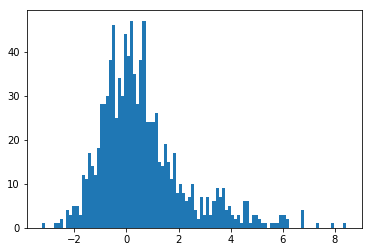

In [8]:
# Traditional Method
mu1, sigma1, n1 = 3, 2, 200
mu2, sigma2, n2 = 0, 1, 800
np.random.seed(seed=42)
x = gaussian.rvs(mu1,sigma1,n1)
y = gaussian.rvs(mu2,sigma2,n2)
z = np.hstack([x,y])
plt.hist(z,bins=100)

(array([ 1.,  2.,  2.,  6.,  1.,  6.,  6.,  6.,  8., 15., 19., 17., 20.,
        24., 23., 24., 33., 32., 35., 32., 35., 45., 45., 40., 43., 46.,
        29., 36., 35., 33., 25., 28., 19., 17., 14., 11., 14.,  8.,  5.,
        12.,  5.,  5.,  8.,  5., 11.,  3.,  6.,  5.,  4.,  3.,  4.,  4.,
         4., 10.,  6.,  6.,  6.,  4.,  1.,  2.,  4.,  4.,  1.,  2.,  1.,
        12.,  0.,  2.,  1.,  1.,  0.,  4.,  1.,  0.,  1.,  0.,  1.,  4.,
         1.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.72467263, -2.6025164 , -2.48036018, -2.35820395, -2.23604772,
        -2.1138915 , -1.99173527, -1.86957904, -1.74742281, -1.62526659,
        -1.50311036, -1.38095413, -1.25879791, -1.13664168, -1.01448545,
        -0.89232923, -0.770173  , -0.64801677, -0.52586054, -0.40370432,
        -0.28154809, -0.15939186, -0.03723564,  0.08492059,  0.20707682,
         0.32923304,  0.45138927,  0.5735455 ,  0.69570172,  0.817857

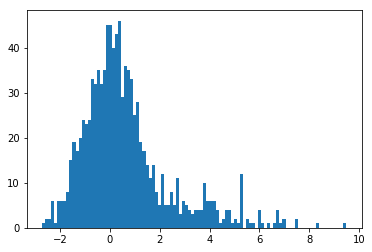

In [9]:
# Inverse Transform
U = uni.rvs(size=200)
x = gaussian.ppf(U, mu1, sigma1)
U = uni.rvs(size=800)
y = gaussian.ppf(U, mu2, sigma2)
z = np.hstack([x,y])
plt.hist(z,bins=100)

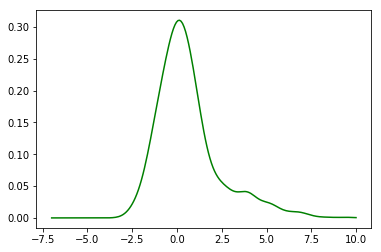

In [10]:
#KDE
kernel=stats.gaussian_kde(z)
xx = np.linspace(-7,10,201)
kdepdf = kernel.evaluate(xx)
plt.plot(xx, kdepdf, color="g")
plt.show()